## In this jupyter notebook, <font color='#ff009a'> land and water productivity </font> are calculated 
* Land productivity = biomass/Crop yield  
* $Biomass(Crop) WP = \frac{Biomass/CropYield}{ET_a}$

**=====================================================================================================================**

![title](img/Fig4.png)

**=====================================================================================================================**

## <font color='green'>1 Import packages/libraries</font>

In [1]:
import os
import sys
import glob

import numpy as np
from matplotlib import pyplot as plt

# change the directory to where the modules are saved
os.chdir(os.path.join(os.path.split(os.getcwd())[0], "Modules"))
from GIS_functions import GIS_function as gis

# <font color='#ff009a'>2 Calculate land productivity = biomass (crop yield) </font>

## <font color='blue'>a) Import the input data (seasonal NPP raster data)</font>

In [2]:
dir_proj = os.path.split(os.getcwd())[0]  # os.getcwd() is for the current directory
dir_data = "Data"

input_folderNPP = os.path.join(dir_proj, dir_data, "2L2_NPP_season") 
input_fhsNPP    = glob.glob(input_folderNPP + '\*.tif')
input_fhsNPP

['E:\\WAPORWP\\Data\\2L2_NPP_season\\NPP_2009-10-01_to_2010-09-30.tif',
 'E:\\WAPORWP\\Data\\2L2_NPP_season\\NPP_2010-10-01_to_2011-09-30.tif',
 'E:\\WAPORWP\\Data\\2L2_NPP_season\\NPP_2011-10-01_to_2012-09-30.tif',
 'E:\\WAPORWP\\Data\\2L2_NPP_season\\NPP_2012-10-01_to_2013-09-30.tif',
 'E:\\WAPORWP\\Data\\2L2_NPP_season\\NPP_2013-10-01_to_2014-09-30.tif',
 'E:\\WAPORWP\\Data\\2L2_NPP_season\\NPP_2014-10-01_to_2015-09-30.tif',
 'E:\\WAPORWP\\Data\\2L2_NPP_season\\NPP_2015-10-01_to_2016-09-30.tif',
 'E:\\WAPORWP\\Data\\2L2_NPP_season\\NPP_2016-10-01_to_2017-09-30.tif',
 'E:\\WAPORWP\\Data\\2L2_NPP_season\\NPP_2017-10-01_to_2018-09-30.tif',
 'E:\\WAPORWP\\Data\\2L2_NPP_season\\NPP_2018-10-01_to_2019-09-30.tif']

## <font color='blue'>b) Make or connect with the directory the output folder</font>

In [3]:
dir_proj = os.path.split(os.getcwd())[0]   
dir_data = "Data"
output_folderBM = os.path.join(dir_proj, dir_data, "4L2_Biomass") 
output_folderBM

# if the directory and folder does not exit, make one
if not os.path.exists(output_folderBM):
    os.makedirs(output_folderBM) 

output_folderBM

'E:\\WAPORWP\\Data\\4L2_Biomass'

## <font color='blue'>c) Calculate the biomass (crop yield) from the NPP</font>

* $Biomass   = AOT*f_c*\frac{NPP*22.222}{1-mc}$
* $CropYield = HI*AOT*f_c*\frac{NPP*22.222}{1-mc}$
<br/>where AOT is the above ground over total biomass production ration (-), fc is the crop factor for C4 crops [-]. NPP is seasonal net primary production in gC/m²/season, mc is moisture content in the fresh biomass [-] and HI is harvest index [-].

In [4]:
# Input crop parameters
AOT= 0.8   # above ground over total biomass production ratio(AOT)
CF = 1.8   # conversion factor for C3 crop is 1.
MC = 0.59  # moisture content, dry matter over freshbiomass
HI = 1     # harvest index of the crop

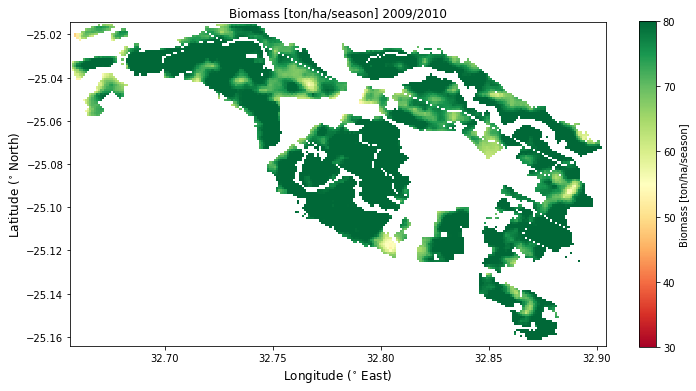

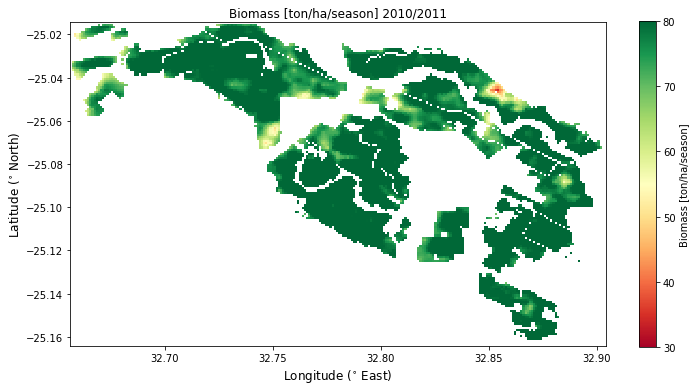

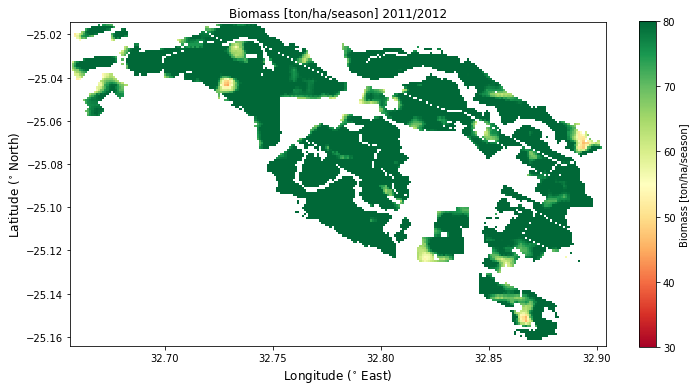

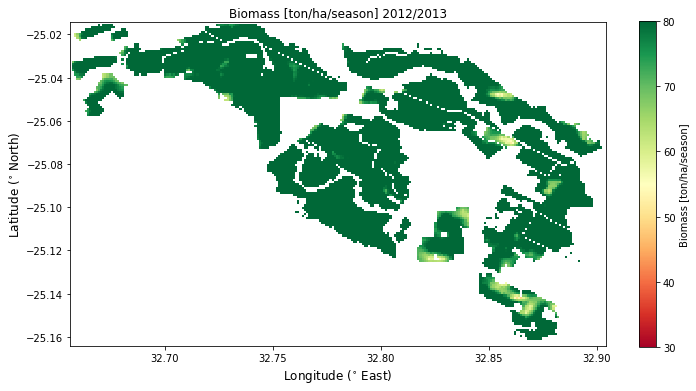

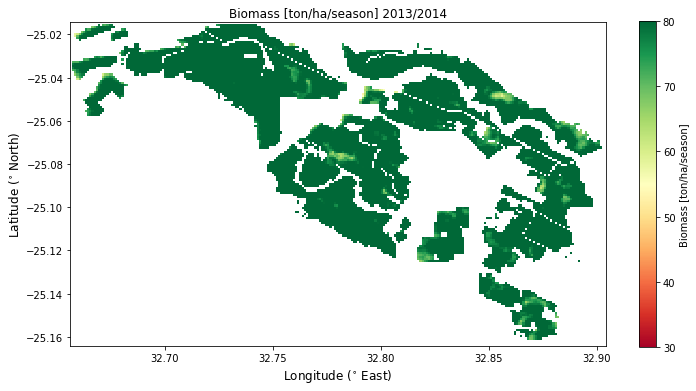

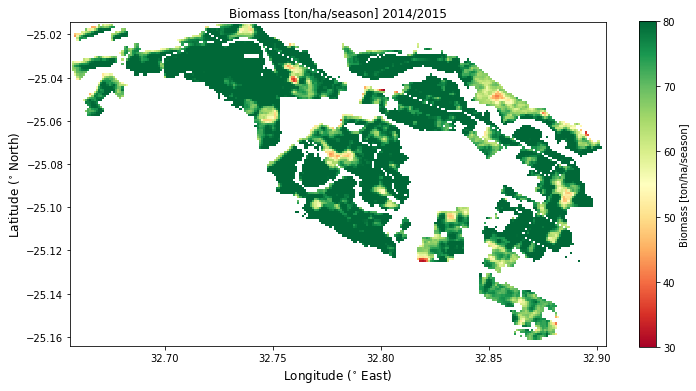

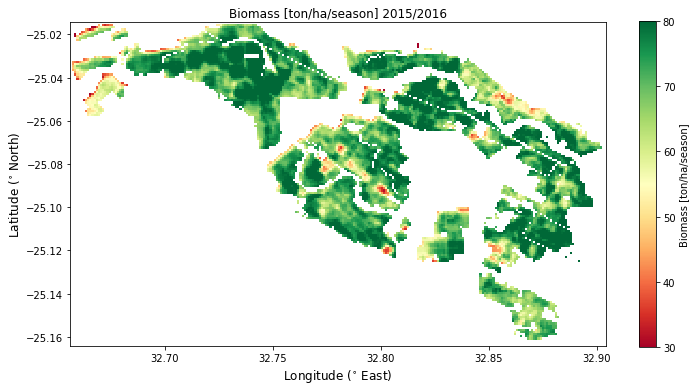

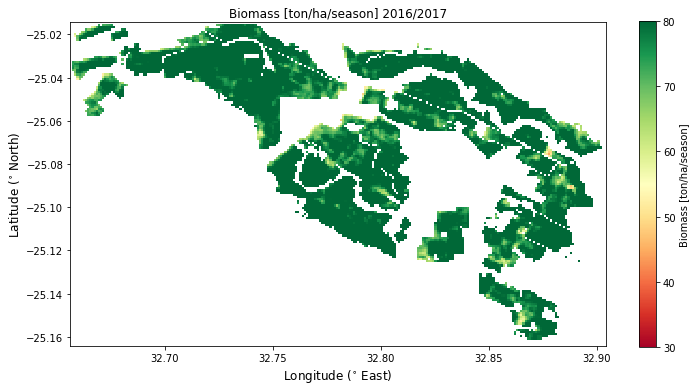

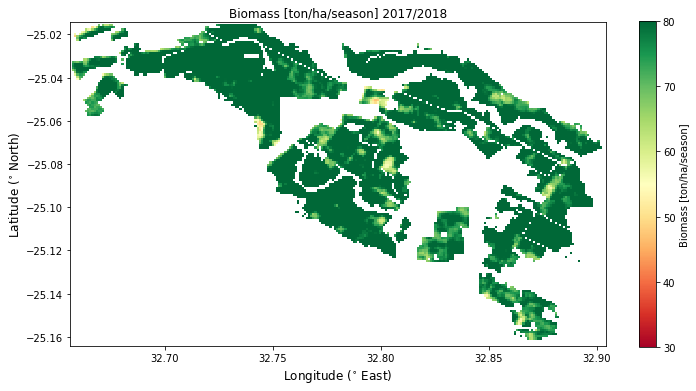

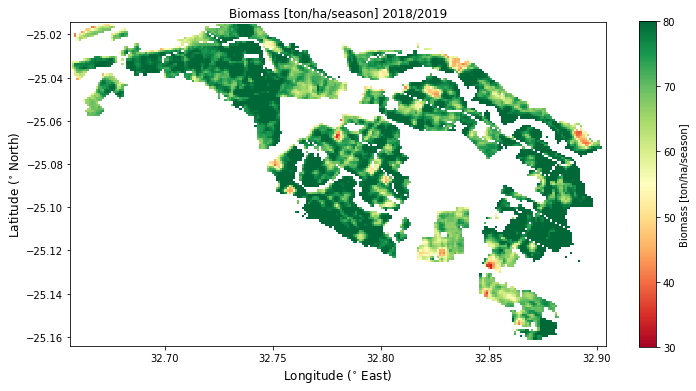

In [5]:
# collecting Geoinfo such as projection, the x and y axis
in_fh = input_fhsNPP[0]      
driver, NDV, xsize, ysize, GeoT, Projection = gis.GetGeoInfo(in_fh)
spatial_extent = (GeoT[0], GeoT[0] + GeoT[1] * xsize, GeoT[3] + GeoT[5] * ysize, GeoT[3])  # get spatial extent of raster

year = 2009
for in_fh in input_fhsNPP:
    NPP = gis.OpenAsArray(in_fh, nan_values=True)  
    CropYield = (HI * AOT * CF * (NPP * 22.222 / (1 - MC))) / 1000  # 1000 is to covert from kg to ton

    # save into output folder
    output_folder = output_folderBM
    basename      = os.path.basename(in_fh).replace('NPP', 'BM')
    output_fn     = os.path.join(output_folder,basename)
    gis.CreateGeoTiff(output_fn, CropYield, driver, NDV, xsize, ysize, GeoT, Projection) 
    
    # Plot the raster map
    seasonal = CropYield
    
    plt.figure(figsize = (12,8))
    plt.imshow(seasonal, cmap='RdYlGn', vmin=np.nanmin(seasonal), vmax=np.nanmax(seasonal), extent=spatial_extent)
    plt.colorbar(shrink=0.75, label='Biomass [ton/ha/season]')
    plt.xlabel('Longitude ($^{\circ}$ East)', fontsize=12)  # add axes label
    plt.ylabel('Latitude ($^{\circ}$ North)', fontsize=12)
    plt.title('Biomass [ton/ha/season] ' + str(year) + '/' + str(year + 1))
    plt.clim(30,80)
    plt.show ()

    year += 1

# <font color='#ff009a'>3 Calculate water productivity (WP)</font>
* $Biomass(Crop) WP = \frac{Biomass (or CropYield)}{ET_a}$
* Water productivity is the ratio of total fresh biomass production [ton/ha/season] to ${ET_a}$ [mm/season]
* 1 ton/ha/mm= 100 kg/m3

## <font color='blue'>a) Import the input data (seasonal ${ET_a}$ and Biomass/yield raster map)</font>

In [6]:
dir_proj = os.path.split(os.getcwd())[0]  
dir_data = "Data"

input_folder1 = os.path.join(dir_proj, dir_data, "2L2_AETI_season") 
input_fhs1    = glob.glob(input_folder1 + '\*.tif')

input_folder2 = os.path.join(dir_proj, dir_data, "4L2_Biomass") 
input_fhs2    = glob.glob(input_folder2 + '\*.tif')

input_fhs1[0], input_fhs2[0]

('E:\\WAPORWP\\Data\\2L2_AETI_season\\AETI_2009-10-01_to_2010-09-30.tif',
 'E:\\WAPORWP\\Data\\4L2_Biomass\\BM_2009-10-01_to_2010-09-30.tif')

## <font color='blue'>b) Make or connect with the directory the output folder</font> 

In [7]:
dir_proj = os.path.split(os.getcwd())[0]  
dir_data = "Data"

output_folderWP = os.path.join(dir_proj, dir_data, "4L2_Biomass_WP") 
output_folderWP

# if the directory and folder does not exit, make one
if not os.path.exists(output_folderWP):
    os.makedirs(output_folderWP) 

output_folderWP

'E:\\WAPORWP\\Data\\4L2_Biomass_WP'

## <font color='blue'>c) Calculate WP</font>

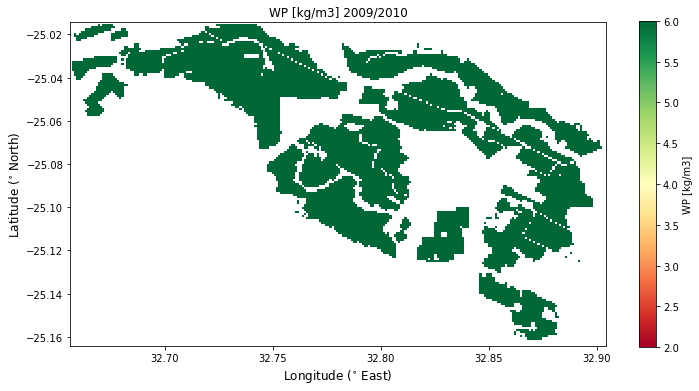

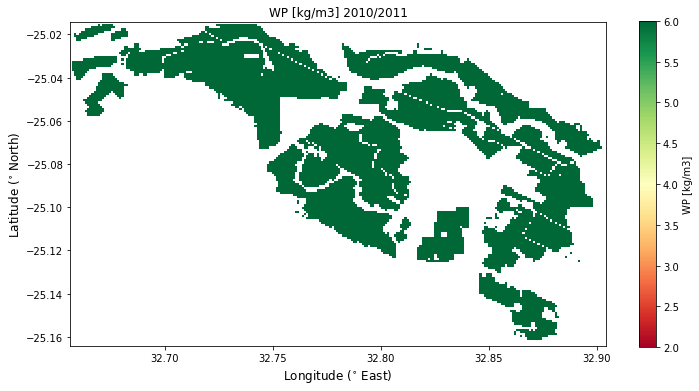

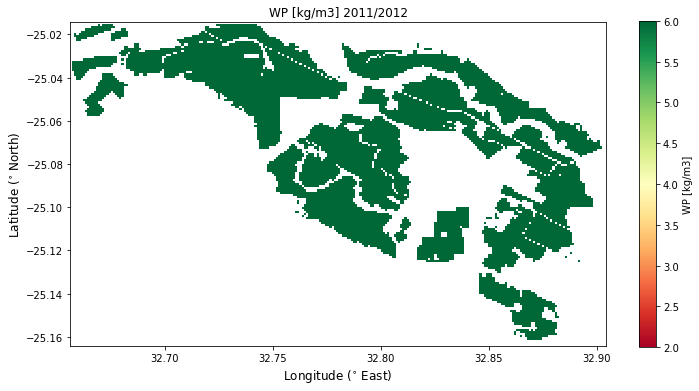

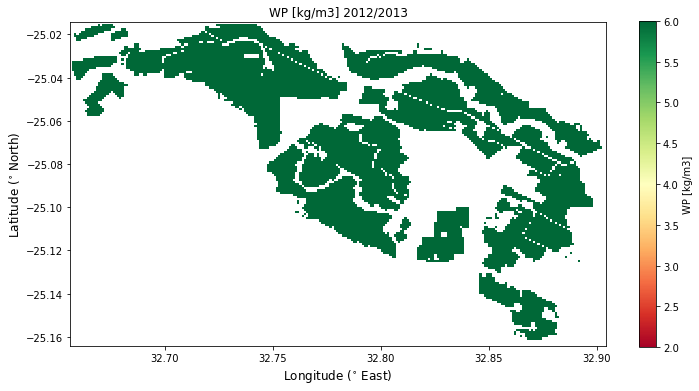

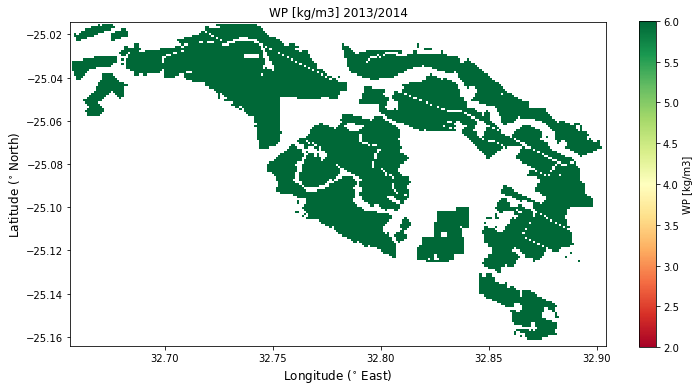

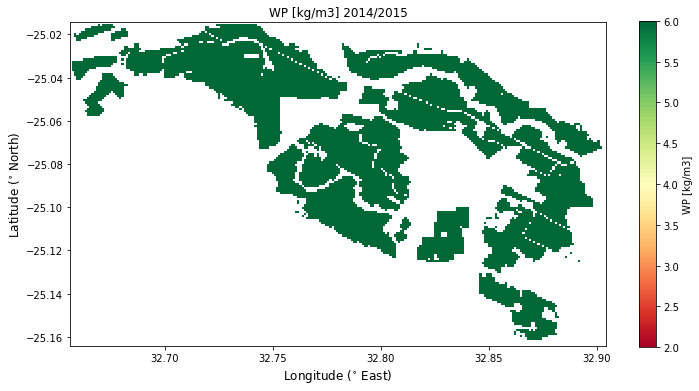

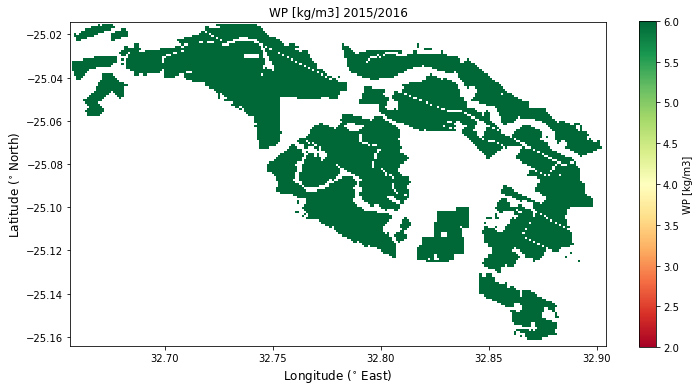

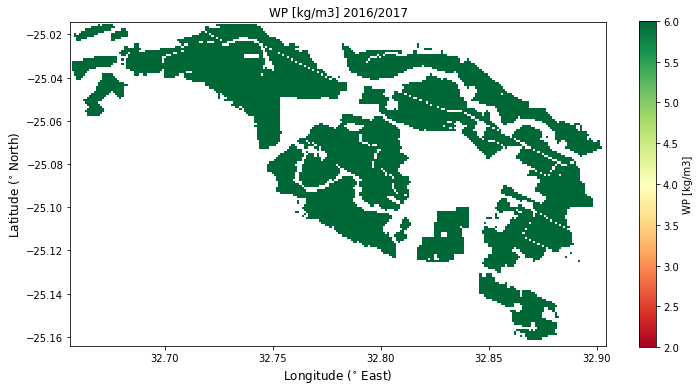

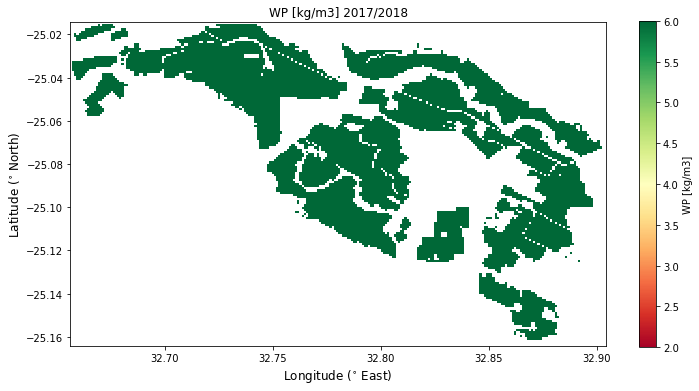

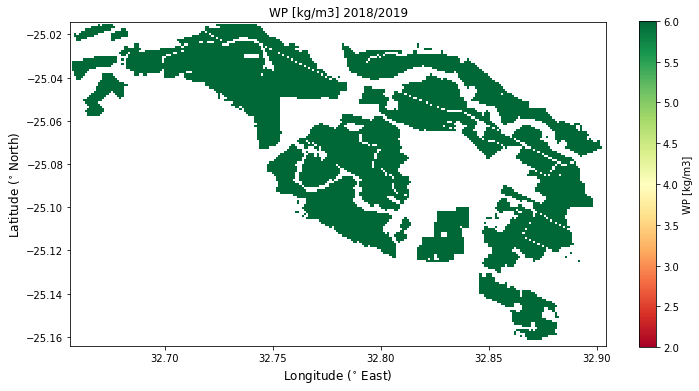

In [8]:
# collecting Geoinfo such as projection, the x and y axis
in_fh = input_fhs1[0]
driver, NDV, xsize, ysize, GeoT, Projection = gis.GetGeoInfo(in_fh)
spatial_extent = (GeoT[0], GeoT[0] + GeoT[1] * xsize, GeoT[3] + GeoT[5] * ysize, GeoT[3])  # get spatial extent of raster

## Calculate the WP
year = 2009
for in_fh1, in_fh2 in zip(input_fhs1, input_fhs2):
    AETI = gis.OpenAsArray(in_fh1, nan_values=True) 
    BM   = gis.OpenAsArray(in_fh2, nan_values=True)
    WP   = BM/AETI*100
    
    # save into output folder
    output_folder = output_folderWP
    basename      = os.path.basename(in_fh1).replace('AETI', 'WP')
    output_fn     = os.path.join(output_folder, basename)
    gis.CreateGeoTiff(output_fn, WP, driver, NDV, xsize, ysize, GeoT, Projection) 
        
    # Plot the raster map
    seasonal = CropYield
    
    plt.figure(figsize = (12,8))
    plt.imshow(seasonal, cmap='RdYlGn', vmin=np.nanmin(seasonal), vmax=np.nanmax(seasonal), extent=spatial_extent)
    plt.colorbar(shrink=0.75, label='WP [kg/m3]')
    plt.xlabel('Longitude ($^{\circ}$ East)', fontsize=12)  # add axes label
    plt.ylabel('Latitude ($^{\circ}$ North)', fontsize=12)
    plt.title('WP [kg/m3] ' + str(year) + '/' + str(year + 1))
    plt.clim(2,6)
    plt.show ()
    
    year += 1   

## Exercise 
* Calculate total biomass or crop yield at harvest for your project area 
* Calculate the WP of crop production for your project area 